In [17]:
#导入库
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('D:/library/Github/Innovative-practice/library/csv/第二学期/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/library/Github/Innovative-practice/library/csv/第二学期/test.csv
D:/library/Github/Innovative-practice/library/csv/第二学期/train.csv


In [18]:
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [19]:
#导入数据
train = pd.read_csv('D:/library/Github/Innovative-practice/library/csv/第二学期/train.csv')
test = pd.read_csv('D:/library/Github/Innovative-practice/library/csv/第二学期/test.csv')

In [20]:
#训练集尾巴
train.tail()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
7555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# 第 6479 行之后的所有值都是 NaN。
train  = train.drop(train.index[6480:])
train.tail()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
6475,6475.0,31/12/17,Athens,37.96245,23.68708,665871.0,shop_3,orange-power,plastic,1.5lt,1.02,33201.0
6476,6476.0,31/12/17,Larisa,39.63689,22.41761,144302.0,shop_5,orange-power,can,330ml,0.47,46971.0
6477,6477.0,31/12/17,Patra,38.24444,21.73444,168501.0,shop_6,adult-cola,glass,500ml,1.02,47708.0
6478,6478.0,31/12/17,Thessaloniki,40.64361,22.93086,353001.0,shop_4,gazoza,plastic,1.5lt,1.34,27115.0
6479,6479.0,31/12/17,Thessaloniki,40.64361,22.93086,353001.0,shop_4,adult-cola,glass,500ml,1.16,30413.0


In [22]:
#查看数据
pd.DataFrame(train.groupby(['brand', 'container'], axis =0, as_index=True).count()['id'])

id
brand        container     
adult-cola   can        430
             glass      432
             plastic    432
gazoza       can        431
             glass      429
             plastic    431
kinder-cola  can        431
             glass      431
             plastic    432
lemon-boost  can        431
             glass      432
             plastic    431
orange-power can        430
             glass      430
             plastic    431

In [23]:
gazoza_train = train[train['brand'] == 'gazoza'].reset_index(drop=True)

#填写缺少的容器类型
gazoza_train.at[340, 'container'] = 'can'
gazoza_train.at[798, 'container'] = 'glass'
gazoza_train.at[984, 'container'] = 'glass'
gazoza_train.at[1214, 'container'] = 'plastic'
gazoza_train.at[1229, 'container'] = 'glass'
# 填写缺少的容量类型
gazoza_train.at[368, 'capacity'] = '1.5lt'
gazoza_train.at[648, 'capacity'] = '500ml'
gazoza_train.at[962, 'capacity'] = '500ml'
# 选择特征
# gazoza_train.drop(['id','shop','long','brand','container'], axis=1, inplace=True)
gazoza_train['date'] = pd.to_datetime(gazoza_train['date'])
#去掉容量列值的后缀，改为数字
gazoza_train['capacity'] = gazoza_train['capacity'].map(lambda x: str(x)[:-2])
gazoza_train['capacity'] = pd.to_numeric(gazoza_train['capacity'])

#----------------------

gazoza_test = test[test['brand'] == 'gazoza'].reset_index(drop=True)
# 填写缺少的容量类型
gazoza_test.at[208, 'capacity'] = '330ml'
gazoza_test.at[209, 'capacity'] = '500ml'
# Choose features
# gazoza_test.drop(['id','shop','long','brand','container'], axis=1, inplace=True)
gazoza_test['date'] = pd.to_datetime(gazoza_test['date'])
# Remove the sufix of the values of the capacity column, Change into numerics
gazoza_test['capacity'] = gazoza_test['capacity'].map(lambda x: str(x)[:-2])
gazoza_test['capacity'] = pd.to_numeric(gazoza_test['capacity'])

# -----------------------
gazoza_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         216 non-null    int64         
 1   date       216 non-null    datetime64[ns]
 2   city       216 non-null    object        
 3   lat        213 non-null    float64       
 4   long       211 non-null    float64       
 5   pop        216 non-null    int64         
 6   shop       216 non-null    object        
 7   brand      216 non-null    object        
 8   container  216 non-null    object        
 9   capacity   216 non-null    float64       
 10  price      216 non-null    float64       
 11  quantity   216 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 20.4+ KB


In [24]:
# 填写训练集 lat 列的缺失值
gazoza_train['lat'] = gazoza_train.apply(lambda row: 37.97945 if (row['shop'] == 'shop_1') else row['lat'],axis=1)
gazoza_train['lat'] = gazoza_train.apply(lambda row: 35.32787 if (row['shop'] == 'shop_2') else row['lat'],axis=1)
gazoza_train['lat'] = gazoza_train.apply(lambda row: 37.96245 if (row['shop'] == 'shop_3') else row['lat'],axis=1)
gazoza_train['lat'] = gazoza_train.apply(lambda row: 39.63689 if (row['shop'] == 'shop_5') else row['lat'],axis=1)
gazoza_train['lat'] = gazoza_train.apply(lambda row: 38.24444 if (row['shop'] == 'shop_6') else row['lat'],axis=1)

# 填写训练集 long 列的缺失值
gazoza_train['long'] = gazoza_train.apply(lambda row: 23.68708 if (row['shop'] == 'shop_3') else row['long'],axis=1)
gazoza_train['long'] = gazoza_train.apply(lambda row: 22.93086 if (row['shop'] == 'shop_4') else row['long'],axis=1)
gazoza_train['long'] = gazoza_train.apply(lambda row: 21.73444 if (row['shop'] == 'shop_6') else row['long'],axis=1)

#填写测试集 lat 列的缺失值
gazoza_test['lat'] = gazoza_test.apply(lambda row: 37.96245 if (row['shop'] == 'shop_3') else row['lat'],axis=1)
gazoza_test['lat'] = gazoza_test.apply(lambda row: 39.63689 if (row['shop'] == 'shop_5') else row['lat'],axis=1)


#填写测试集long列的缺失值
gazoza_test['long'] = gazoza_test.apply(lambda row: 23.68708 if (row['shop'] == 'shop_3') else row['long'],axis=1)
gazoza_test['long'] = gazoza_test.apply(lambda row: 21.73444 if (row['shop'] == 'shop_6') else row['long'],axis=1)
gazoza_test['long'] = gazoza_test.apply(lambda row: 25.14341 if (row['shop'] == 'shop_2') else row['long'],axis=1)
gazoza_test['long'] = gazoza_test.apply(lambda row: 23.71622 if (row['shop'] == 'shop_1') else row['long'],axis=1)
gazoza_test['long'] = gazoza_test.apply(lambda row: 22.41761 if (row['shop'] == 'shop_5') else row['long'],axis=1)

In [25]:
gazoza_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         1296 non-null   float64       
 1   date       1296 non-null   datetime64[ns]
 2   city       1296 non-null   object        
 3   lat        1296 non-null   float64       
 4   long       1296 non-null   float64       
 5   pop        1296 non-null   float64       
 6   shop       1296 non-null   object        
 7   brand      1296 non-null   object        
 8   container  1296 non-null   object        
 9   capacity   1296 non-null   float64       
 10  price      1296 non-null   float64       
 11  quantity   1296 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 121.6+ KB


In [26]:
gazoza_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         216 non-null    int64         
 1   date       216 non-null    datetime64[ns]
 2   city       216 non-null    object        
 3   lat        216 non-null    float64       
 4   long       216 non-null    float64       
 5   pop        216 non-null    int64         
 6   shop       216 non-null    object        
 7   brand      216 non-null    object        
 8   container  216 non-null    object        
 9   capacity   216 non-null    float64       
 10  price      216 non-null    float64       
 11  quantity   216 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 20.4+ KB


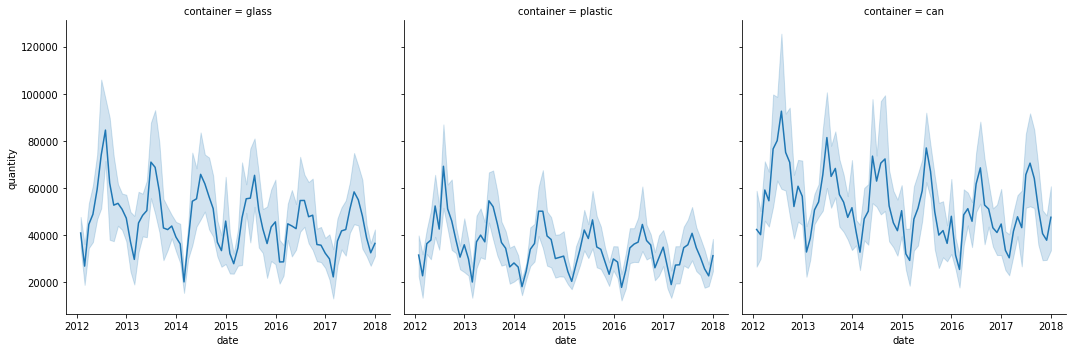

In [27]:
sns.relplot(data=gazoza_train, x='date', y='quantity', col = 'container', kind='line')

In [28]:
gazoza_train[(gazoza_train['city'] == 'Athens') & (gazoza_train['capacity'] == 1.5)]

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
9,55.0,2012-01-31,Athens,37.96245,23.68708,672130.0,shop_3,gazoza,plastic,1.5,1.16,14480.0
17,86.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,gazoza,plastic,1.5,0.85,26884.0
19,97.0,2012-02-29,Athens,37.97945,23.71622,672130.0,shop_1,gazoza,plastic,1.5,1.35,7946.0
26,143.0,2012-02-29,Athens,37.96245,23.68708,672130.0,shop_3,gazoza,plastic,1.5,0.98,14749.0
46,235.0,2012-03-31,Athens,37.96245,23.68708,672130.0,shop_3,gazoza,plastic,1.5,0.45,33115.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1258,6294.0,2017-10-31,Athens,37.96245,23.68708,665871.0,shop_3,gazoza,plastic,1.5,1.45,14238.0
1261,6309.0,2017-11-30,Athens,37.97945,23.71622,665871.0,shop_1,gazoza,plastic,1.5,1.31,19973.0
1270,6356.0,2017-11-30,Athens,37.96245,23.68708,665871.0,shop_3,gazoza,plastic,1.5,1.40,15525.0
1279,6399.0,2017-12-31,Athens,37.97945,23.71622,665871.0,shop_1,gazoza,plastic,1.5,1.31,22911.0


## 时间序列分析

In [29]:
qty = pd.DataFrame(gazoza_train.groupby(['date'], axis =0, as_index=True).sum()['quantity'])

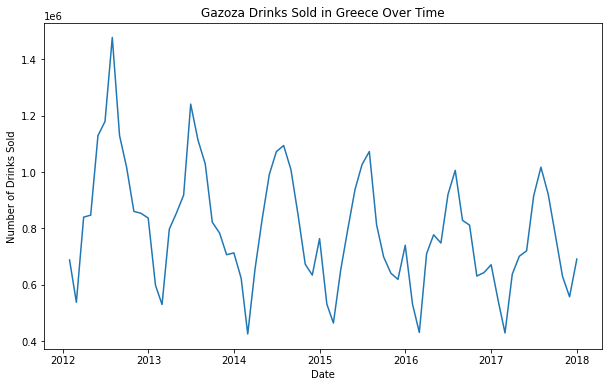

In [30]:
#多年来 Gazoza 的销售曲线图

plt.xlabel("Date")
plt.ylabel("Number of Drinks Sold")
plt.title("Gazoza Drinks Sold in Greece Over Time")
plt.plot(qty)

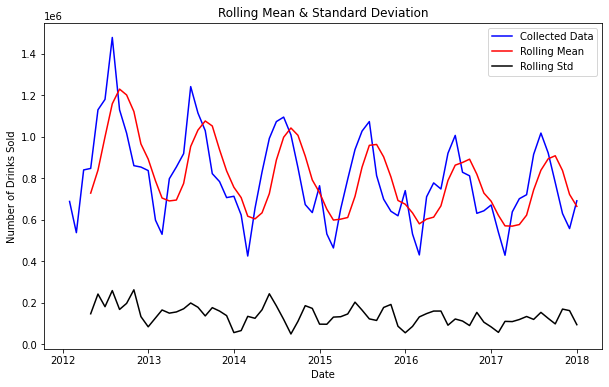

In [31]:
# 确定rolling统计

rolmean = qty.rolling(window = 4).mean()
rolstd = qty.rolling(window = 4).std()

# Plot rolling statistics:
orig = plt.plot(qty, color='blue', label='Collected Data')
meanR = plt.plot(rolmean, color='red', label='Rolling Mean')
stdR = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling Mean & Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Number of Drinks Sold")
plt.show(block = False)

使用滚动统计，我们可以假设数据在一段时间内不是静止的。 但是，我们可以进行 Dikey-Fuller 检验以确定这是否在统计上得到支持。

In [32]:
# 执行 Dickey-Fuller 测试

from statsmodels.tsa.stattools import adfuller

def dickeyfuller(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries[:], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [33]:
dickeyfuller(qty)

Results of Dickey-Fuller Test:
Test Statistic                 -3.282210
p-value                         0.015693
#Lags Used                     12.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


根据 Dickey-Fuller 检验，时间序列的趋势在 95% 的置信水平上不具有统计显着性。 我们看到检验的 p 值小于 0.05。

Text(0.5, 1.0, 'Log Scale Gazoza Drinks Sold in Greece Over Time')

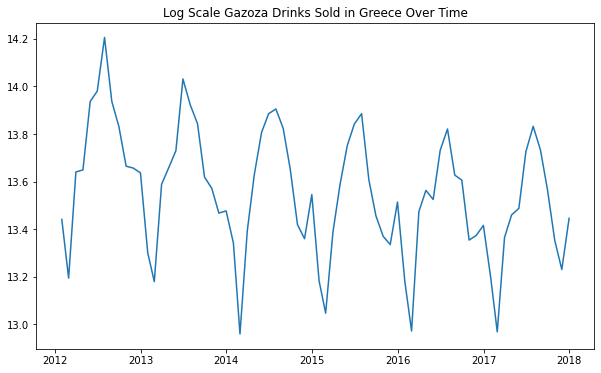

In [34]:
qty_log = np.log(qty)
plt.plot(qty_log)
plt.title("Log Scale Gazoza Drinks Sold in Greece Over Time")

In [35]:
dickeyfuller(qty_log)

Results of Dickey-Fuller Test:
Test Statistic                 -2.783541
p-value                         0.060664
#Lags Used                     12.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


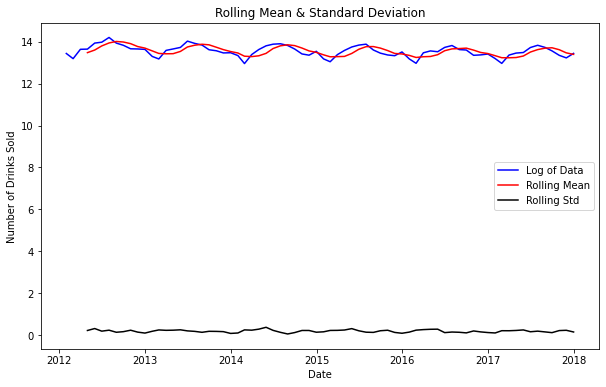

In [36]:
# 确定rolling统计

rolmean_log = qty_log.rolling(window = 4).mean()
rolstd_log = qty_log.rolling(window = 4).std()

# 绘制rolling统计：
orig_log = plt.plot(qty_log, color='blue', label='Log of Data')
meanR_log = plt.plot(rolmean_log, color='red', label='Rolling Mean')
stdR_log = plt.plot(rolstd_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling Mean & Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Number of Drinks Sold")
plt.show(block = False)

Results of Dickey-Fuller Test:
Test Statistic                 -3.949897
p-value                         0.001697
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


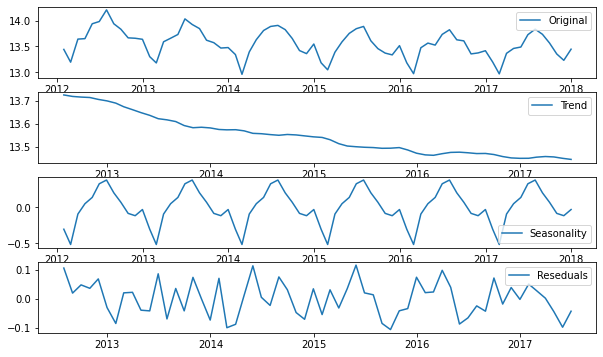

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
desomposition = seasonal_decompose(qty_log)

trend = desomposition.trend
seasonal = desomposition.seasonal
resedual = desomposition.resid

plt.subplot(411)
plt.plot(qty_log, label="Original")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label ='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label ='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(resedual, label ='Reseduals')
plt.legend(loc='best')

decomposedLogData = resedual
decomposedLogData.dropna(inplace = True)
dickeyfuller(decomposedLogData)

Text(0.5, 1.0, 'Shift values to use in forecasting')

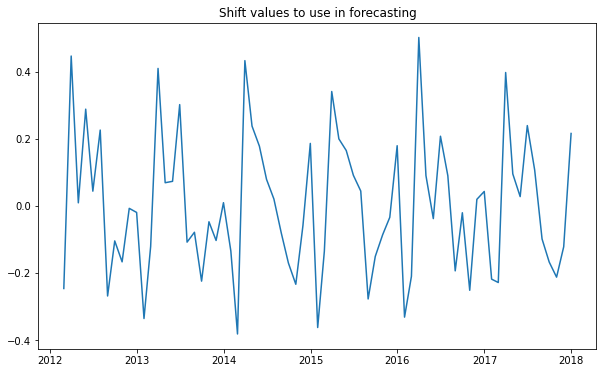

In [38]:
dataLogDiffShifting = qty_log - qty_log.shift()
plt.plot(dataLogDiffShifting)
plt.title("Shift values to use in forecasting")

C:\Users\weixiabing\.virtualenvs\Innovative-practice-HHChy52D\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\weixiabing\.virtualenvs\Innovative-practice-HHChy52D\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


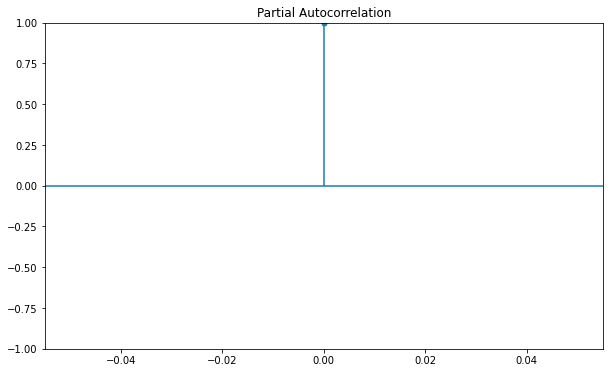

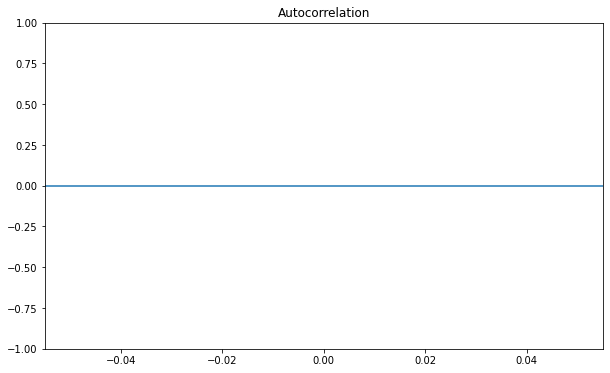

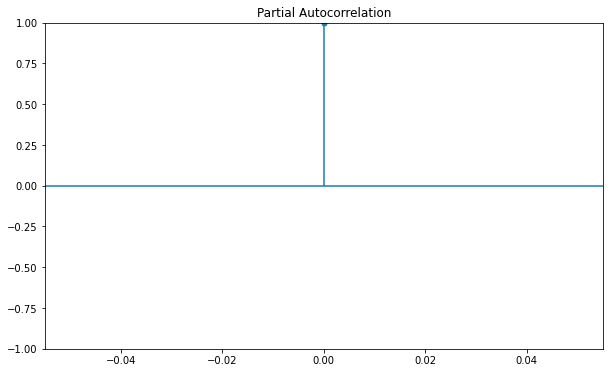

In [41]:
#绘制dataLogDiffShifting的自相关图和偏相关图
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(dataLogDiffShifting, lags=4)
plot_pacf(dataLogDiffShifting, lags=4)


In [ ]:
dataLogDiffShifting.dropna(inplace=True)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


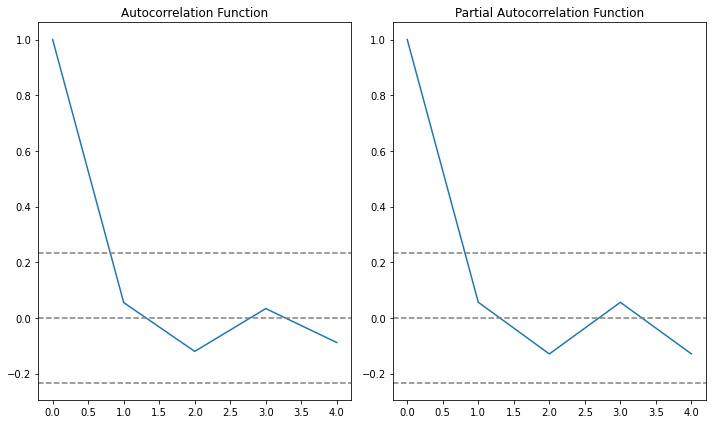

In [ ]:
#ACF  and PACF 图像:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(dataLogDiffShifting, nlags = 4)
lag_pacf = pacf(dataLogDiffShifting, nlags = 4, method = 'ols') # ordinary least square

#画图 ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color ='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataLogDiffShifting)), linestyle = '--', color ='gray')
plt.axhline(y=1.96/np.sqrt(len(dataLogDiffShifting)), linestyle = '--', color ='gray')
plt.title('Autocorrelation Function')

#绘制 PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color ='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataLogDiffShifting)), linestyle = '--', color ='gray')
plt.axhline(y=1.96/np.sqrt(len(dataLogDiffShifting)), linestyle = '--', color ='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be use

Plotting AR Model


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


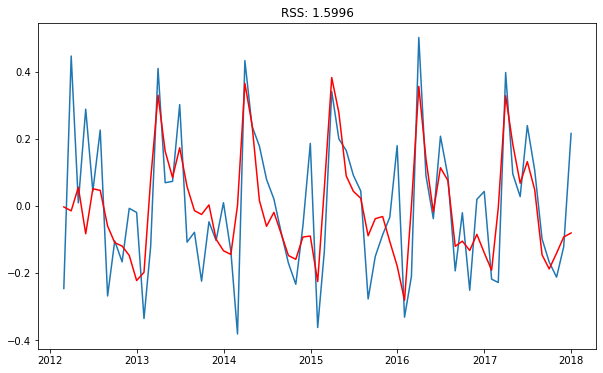

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(qty_log, order = (5,1,2)) #P, d, Q values
results_AR = model.fit(disp = -1)
plt.plot(dataLogDiffShifting)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - dataLogDiffShifting['quantity'])**2))
print('Plotting AR Model')

In [ ]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head())

date
2012-02-29   -0.003516
2012-03-31   -0.015290
2012-04-30    0.054917
2012-05-31   -0.083593
2012-06-30    0.050545
dtype: float64


In [ ]:
# 转换为累计和
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

date
2012-02-29   -0.003516
2012-03-31   -0.018806
2012-04-30    0.036111
2012-05-31   -0.047482
2012-06-30    0.003063
dtype: float64


In [ ]:
predictions_ARIMA_log = pd.Series(qty_log['quantity'], index=qty_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA_log.head()

date
2012-01-31    13.441298
2012-02-29    13.191092
2012-03-31    13.621922
2012-04-30    13.685481
2012-05-31    13.889686
dtype: float64

Text(0, 0.5, 'Quantity Sold')

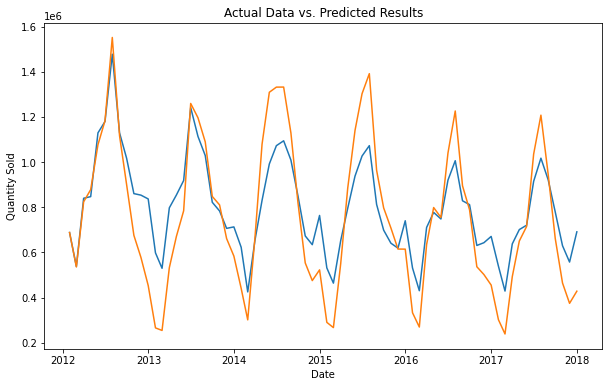

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(qty)
plt.plot(predictions_ARIMA)
plt.title("Actual Data vs. Predicted Results")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")

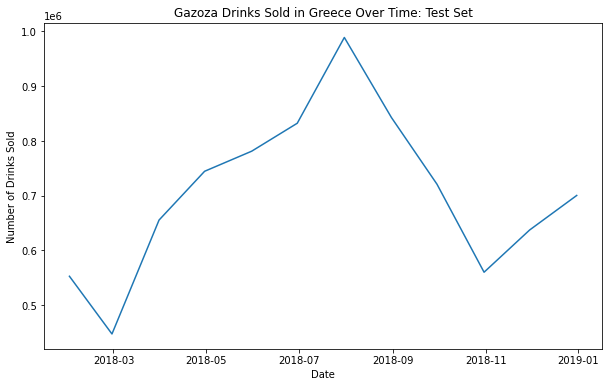

In [ ]:
qty_test = pd.DataFrame(gazoza_test.groupby(['date'], axis =0, as_index=True).sum()['quantity'])

#多年来 Gazoza 的销售曲线图

plt.xlabel("Date")
plt.ylabel("Number of Drinks Sold")
plt.title("Gazoza Drinks Sold in Greece Over Time: Test Set")
plt.plot(qty_test)

Text(0.5, 0, 'Date')

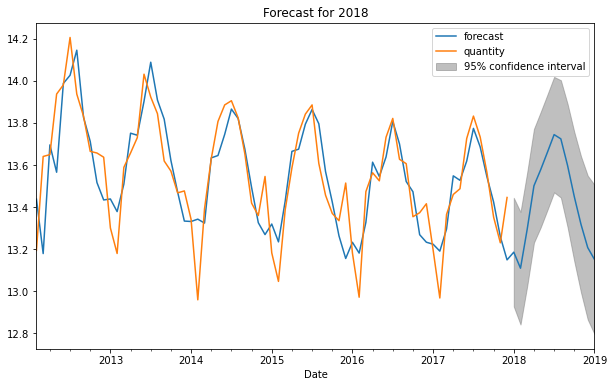

In [ ]:
results_AR.plot_predict(1,84)
plt.title("Forecast for 2018")
plt.xlabel("Date")

In [ ]:
forecast_18 = pd.Series(results_AR.forecast(steps=12)[0])

In [ ]:
forecast_18.index = qty_test.index

In [ ]:
conf_int = results_AR.forecast(steps=12)[2]
high = []
low = []
for x in conf_int:
    low.append(x[0])
    high.append(x[1])
    
low_bound = pd.Series(low, index = qty_test.index)
high_bound = pd.Series(high, index = qty_test.index)

Text(0, 0.5, 'Quantity Sold')

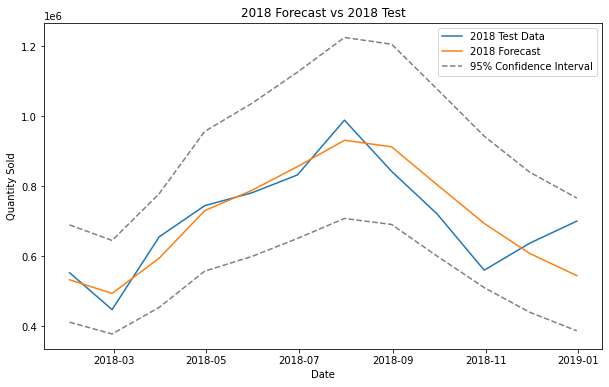

In [ ]:
plt.plot(qty_test, label = "2018 Test Data")
plt.plot(np.exp(forecast_18), label = "2018 Forecast")

plt.plot(np.exp(low_bound), linestyle = '--', color ='gray', label = '95% Confidence Interval')
plt.plot(np.exp(high_bound), linestyle = '--', color ='gray')

plt.legend(loc='best')
plt.title("2018 Forecast vs 2018 Test")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")


In [ ]:
NN_pred = [27995.53125, 23516.5625, 43323.83203125, 29774.40234375, 33537.34765625, 70139.9453125, 43992.3203125, 52559.10546875, 28519.216796875, 41201.68359375, 37230.76171875, 28008.6328125, 15068.306640625, 53544.8515625, 27877.029296875, 55124.234375, 46199.5234375, 37970.35546875, 20397.423828125, 17169.49609375, 24014.318359375, 30734.091796875, 19227.01953125, 35711.67578125, 43398.37109375, 24988.18359375, 49291.14453125, 33905.75390625, 21092.140625, 18523.40625, 8996.20703125, 32146.455078125, 13686.7841796875, 14233.4130859375, 27304.142578125, 46164.00390625, 31509.890625, 26958.54296875, 38854.87109375, 38880.48828125, 35190.87109375, 49890.19140625, 71913.0625, 40483.1875, 34886.7421875, 19460.2265625, 37590.765625, 31629.5234375, 38371.40234375, 34561.57421875, 55011.75, 58391.1875, 23737.64453125, 45129.44140625, 25710.375, 33765.53515625, 34778.96875, 31293.46484375, 47564.203125, 37007.83203125, 33198.61328125, 31615.2265625, 30672.3203125, 16498.169921875, 25355.603515625, 38380.02734375, 19921.14453125, 15839.169921875, 52092.11328125, 52734.98046875, 66335.6875, 38484.32421875, 33439.15234375, 21001.66796875, 42554.59765625, 35852.05859375, 50307.07421875, 50665.0, 69231.234375, 42383.16015625, 26663.25, 53392.8671875, 28573.515625, 34009.9453125, 39956.50390625, 26632.994140625, 37432.921875, 41723.14453125, 49404.46875, 45379.0546875, 26688.580078125, 37427.03125, 37474.4921875, 24938.96484375, 48030.3046875, 43909.546875, 29060.2109375, 67551.9375, 50301.796875, 23725.052734375, 13720.724609375, 33999.34375, 28512.76953125, 10637.6240234375, 39149.33203125, 25444.76171875, 30374.298828125, 35924.77734375, 31564.185546875, 29570.2890625, 40910.09375, 26785.978515625, 53981.1875, 52303.34375, 35203.890625, 69333.734375, 42392.890625, 37152.0234375, 58010.87890625, 32404.88671875, 29477.134765625, 44852.078125, 26087.58203125, 41751.3203125, 49078.78515625, 20083.494140625, 32528.818359375, 43357.875, 44197.8046875, 33356.62890625, 45851.48828125, 71055.59375, 43619.21484375, 42871.9375, 30516.349609375, 32907.0078125, 41599.7109375, 21804.482421875, 21607.615234375, 57112.26953125, 40662.93359375, 34989.27734375, 54343.9765625, 52764.5859375, 31167.564453125, 39070.9609375, 47230.59375, 37018.05078125, 38778.203125, 28512.91015625, 27252.984375, 42987.33203125, 26270.578125, 24253.88671875, 40682.4296875, 41081.109375, 51537.83984375, 25260.09765625, 64921.359375, 13649.220703125, 50031.4375, 19499.998046875, 27483.662109375, 19638.134765625, 39703.21875, 41357.453125, 24828.607421875, 55624.38671875, 56818.8671875, 44787.83984375, 75056.171875, 46479.01171875, 40996.97265625, 53417.18359375, 29909.45703125, 21538.673828125, 41609.44140625, 35022.06640625, 26955.34375, 44190.3828125, 30243.65625, 23796.41796875, 34811.61328125, 43152.23046875, 51311.85546875, 53467.75, 41293.0859375, 70035.671875, 39494.1171875, 29174.099609375, 58109.79296875, 32986.46875, 27690.654296875, 40554.1328125, 28288.490234375, 37389.99609375, 14594.43359375, 18129.9140625, 35436.28515625, 26497.876953125, 46253.0234375, 39117.265625, 56855.5703125, 55177.7265625, 44436.01953125, 71817.46875, 46895.90234375, 36585.85546875, 58718.1640625, 37862.078125, 16612.62890625, 41212.01171875, 34686.59375, 26125.1171875, 46643.03125, 49484.62890625]
NN_comp = pd.Series(NN_pred, index = gazoza_test['date'])

In [ ]:
NN_ts = pd.DataFrame(NN_comp.groupby(['date'], axis =0, as_index=True).sum())

Text(0, 0.5, 'Quantity Sold')

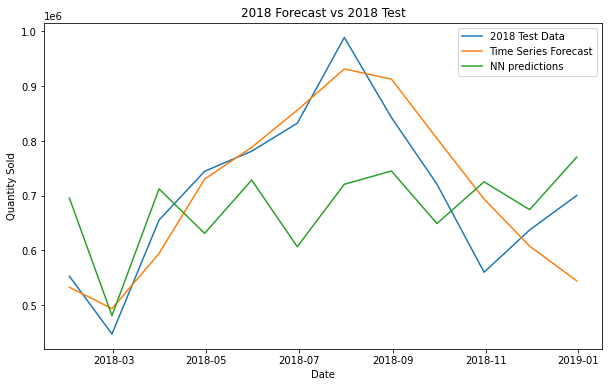

In [ ]:
plt.plot(qty_test, label = "2018 Test Data")
plt.plot(np.exp(forecast_18), label = "Time Series Forecast")
plt.plot(NN_ts, label = "NN predictions")

plt.legend(loc='best')
plt.title("2018 Forecast vs 2018 Test")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")

In [ ]:
from scipy.stats import norm

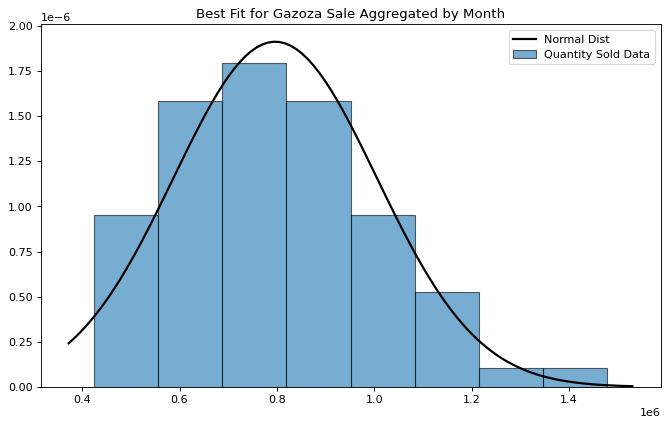

In [ ]:
# 绘制直方图
plt.figure(figsize=(10, 6), dpi=80)
plt.hist(qty, bins = 8, edgecolor='black', alpha = 0.6, density = True, label = "Quantity Sold Data") 

# 绘制 PDF。
xmin_qty, xmax_qty = plt.xlim()
x_qty = np.linspace(xmin_qty, xmax_qty, 100)
p_qty = norm.pdf(x_qty, np.mean(qty), np.std(qty))
plt.plot(x_qty, p_qty, 'k', linewidth=2, label = "Normal Dist")
title_qty = "Best Fit for Gazoza Sale Aggregated by Month"
plt.legend(loc='best')
plt.title(title_qty)

plt.show()

Text(0, 0.5, 'Quantity Sold')

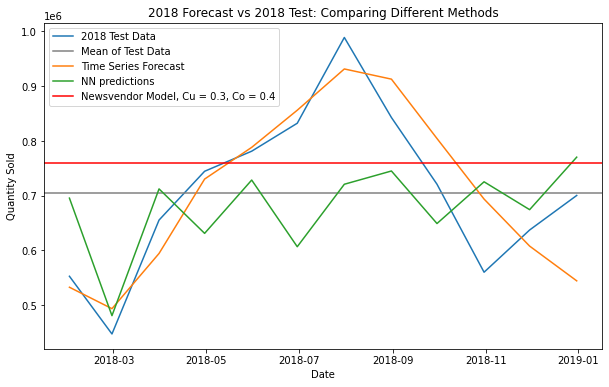

In [ ]:
# 796533.11111111
plt.plot(qty_test, label = "2018 Test Data")
plt.axhline(y=np.mean(qty_test['quantity']), label = "Mean of Test Data", color = 'gray')
plt.plot(np.exp(forecast_18), label = "Time Series Forecast")
plt.plot(NN_ts, label = "NN predictions")
plt.axhline(y=758986.05493514, label = "Newsvendor Model, Cu = 0.3, Co = 0.4", color = 'red')

plt.legend(loc='best')
plt.title("2018 Forecast vs 2018 Test: Comparing Different Methods")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")

假设我们准确地订购了需求预测的数量。 每种方法的成本可以计算如下

In [ ]:
def cost_function(data, pred, Cu, Co):
    total_cost = 0
    for i in range(len(data)):
        if pred.values[i] > data.values[i]:
            total_cost = total_cost + Co*(pred.values[i]-data.values[i])
        else:
            total_cost = total_cost + Cu*(data.values[i]-pred.values[i])
    return total_cost

In [ ]:
print("NN results")
cost_function(qty_test, NN_ts, 0.3, 0.4)[0]

NN results


450823.36884765624

In [ ]:
print("TS results")
cost_function(qty_test, np.exp(forecast_18), 0.3, 0.4)[0]

TS results


247053.34262821413

In [ ]:
print("NV results")
NV_list = []
for x in range(len(qty_test)):
    NV_list.append(758986.05493514)
NV_array = pd.Series(NV_list)
cost_function(qty_test, NV_array, 0.3, 0.4)[0]

NV results


543696.1098702799